# Covid-19 and the gaming industry

Used datasets:
- [CPI (USD)](https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems)
- [E-sport earnings data](https://www.kaggle.com/rankirsh/esports-earnings?select=HistoricalEsportData.csv)
- [Games popularity](https://www.kaggle.com/michau96/popularity-of-games-on-steam)
## Goal
The goal is to find out how Covid-19 pandemic affected gaming industry.
Specifically we want to focus on Steam games popularity and e-sport tournament earnings.

## Data preparation

In [1]:
import pandas as pd
from IPython.core.display import display

### CPI data preparation

In [2]:
cpi_df_raw = pd.read_csv("data/cu.data.1.AllItems", delim_whitespace=True)
cpi_df = cpi_df_raw.copy()
display(cpi_df.head())
display(cpi_df.describe(include="all"))

series_id  year period  value  footnote_codes
0  CUSR0000SA0  1947    M01  21.48             NaN
1  CUSR0000SA0  1947    M02  21.62             NaN
2  CUSR0000SA0  1947    M03  22.00             NaN
3  CUSR0000SA0  1947    M04  22.00             NaN
4  CUSR0000SA0  1947    M05  21.95             NaN

series_id          year period         value  footnote_codes
count         58954  58954.000000  58954  58954.000000             0.0
unique          201           NaN     16           NaN             NaN
top     CUUR0000SA0           NaN    M13           NaN             NaN
freq           1413           NaN   5725           NaN             NaN
mean            NaN   1984.049581    NaN    199.526512             NaN
std             NaN     26.867720    NaN    178.992573             NaN
min             NaN   1913.000000    NaN      8.700000             NaN
25%             NaN   1965.000000    NaN     69.000000             NaN
50%             NaN   1990.000000    NaN    151.000000             NaN
75%             NaN   2006.000000    NaN    255.928500             NaN
max             NaN   2021.000000    NaN   1096.011000             NaN

Drop redundant data:

In [3]:
cpi_df.drop(columns="footnote_codes", inplace=True, errors="ignore")
# We want rows where series_id=="CUSR0000SA0"
# (All items in U.S. city average, all urban consumers, seasonally adjusted)
cpi_df = cpi_df.loc[cpi_df['series_id'] == "CUSR0000SA0"]
cpi_df.drop(columns="series_id", inplace=True, errors="ignore")
display(cpi_df.head())

year period  value
0  1947    M01  21.48
1  1947    M02  21.62
2  1947    M03  22.00
3  1947    M04  22.00
4  1947    M05  21.95

Check periods in the dataset:

In [4]:
display(cpi_df["period"].unique())

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

Construct ```datetime``` column and drop ```year``` and ```period```:

In [5]:
cpi_df["datetime"] = pd.to_datetime(cpi_df.year.astype(str) + '-' + cpi_df.period.str[1:] + '-01')
cpi_df.drop(columns=["year", "period"], inplace=True, errors="ignore")

Use ```datetime``` as an index:

In [6]:
cpi_df.set_index("datetime", inplace=True)
display(cpi_df)

value
datetime           
1947-01-01   21.480
1947-02-01   21.620
1947-03-01   22.000
1947-04-01   22.000
1947-05-01   21.950
...             ...
2021-05-01  268.551
2021-06-01  270.981
2021-07-01  272.265
2021-08-01  273.012
2021-09-01  274.138

[897 rows x 1 columns]

### E-sport earnings data preparation
Load e-sport earnings data

In [7]:
# Notice the encoding
esport_df_raw = pd.read_csv("data/HistoricalEsportData.csv", encoding="latin1")
esport_df = esport_df_raw.copy()
display(esport_df.describe(include="all"))
display(esport_df.info())
display(esport_df.head(12))

Date                  Game      Earnings      Players  \
count         7012                  7012  7.012000e+03  7012.000000   
unique         273                   505           NaN          NaN   
top     2020-06-01  StarCraft: Brood War           NaN          NaN   
freq           113                   215           NaN          NaN   
mean           NaN                   NaN  1.471553e+05    52.709641   
std            NaN                   NaN  9.258377e+05   119.655604   
min            NaN                   NaN  0.000000e+00     0.000000   
25%            NaN                   NaN  9.847575e+02     5.000000   
50%            NaN                   NaN  8.873090e+03    15.000000   
75%            NaN                   NaN  5.517293e+04    44.000000   
max            NaN                   NaN  3.671356e+07  1699.000000   

        Tournaments  
count   7012.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       6.546492  
std       12.236239  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        6.000000  
max      172.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7012 non-null   object 
 1   Game         7012 non-null   object 
 2   Earnings     7012 non-null   float64
 3   Players      7012 non-null   int64  
 4   Tournaments  7012 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 274.0+ KB


None

Date                  Game  Earnings  Players  Tournaments
0   1998-01-01            QuakeWorld   15000.0        8            1
1   1998-05-01              Quake II   14600.0        4            1
2   1998-07-01              Quake II   15000.0        5            1
3   1998-07-01            QuakeWorld    6500.0        4            1
4   1998-11-01              Quake II   36600.0       13            2
5   1998-11-01            QuakeWorld   22000.0        0            1
6   1998-11-01  StarCraft: Brood War   20000.0        8            1
7   1998-12-01        Age of Empires    2000.0        1            1
8   1999-03-01              Quake II   15000.0        5            1
9   1999-04-01  StarCraft: Brood War    3000.0        2            1
10  1999-05-01              Quake II   27400.0        8            1
11  1999-05-01  StarCraft: Brood War   27400.0        8            1

Convert date column to ```DateTime```

In [8]:
esport_df["Date"] = pd.to_datetime(esport_df["Date"])

Aggregate data by date

In [9]:
esport_monthly_sum_df = esport_df.drop(columns="Game").groupby(esport_df["Date"], as_index=True).sum()
display(esport_monthly_sum_df.tail())

Earnings  Players  Tournaments
Date                                         
2021-06-01  15990191.90     3638          302
2021-07-01   5194184.81     3009          291
2021-08-01  15883803.01     2992          222
2021-09-01   7383735.13     1689          129
2021-10-01    155129.80      243           18

Check if dataframe contains any days other than first

In [10]:
display(esport_monthly_sum_df.index.day.unique())

Int64Index([1], dtype='int64', name='Date')

There are no other days, dataset is thus aggregated by month

### Steam game popularity data preparation
Load Steam game popularity dataset

In [11]:
popularity_df_raw = pd.read_csv("data/SteamCharts.csv", encoding="latin1")
popularity_df = popularity_df_raw.copy()
display(popularity_df.info())
display(popularity_df.describe())
display(popularity_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           82529 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


None

year           avg           gain          peak
count  83789.000000  8.378900e+04   82529.000000  8.378900e+04
mean    2017.338708  2.792017e+03     -10.245559  5.518877e+03
std        2.237587  2.648480e+04    3789.944005  5.015571e+04
min     2012.000000  0.000000e+00 -250248.990000  0.000000e+00
25%     2016.000000  5.325000e+01     -38.310000  1.380000e+02
50%     2018.000000  2.042700e+02      -1.630000  5.020000e+02
75%     2019.000000  7.716500e+02      22.320000  1.741000e+03
max     2021.000000  1.584887e+06  426446.120000  3.236027e+06

gamename  year      month        avg      gain  \
0  Counter-Strike: Global Offensive  2021  February   741013.24  -2196.42   
1  Counter-Strike: Global Offensive  2021   January   743209.66  25405.91   
2  Counter-Strike: Global Offensive  2020  December   717803.75  49049.17   
3  Counter-Strike: Global Offensive  2020  November   668754.58  55087.89   
4  Counter-Strike: Global Offensive  2020   October   613666.69   6816.37   

      peak avg_peak_perc  
0  1123485      65.9567%  
1  1124553      66.0893%  
2  1164396       61.646%  
3  1037464      64.4605%  
4   943876      65.0156%

Create ```date``` column

In [12]:
date_col = pd.to_datetime(popularity_df["year"].astype("str") + " " + popularity_df["month"] + " 01")
popularity_df.insert(loc=1, column="date", value=date_col)
popularity_df.drop(columns=["year", "month"], inplace=True)
display(popularity_df.head())

gamename       date        avg      gain     peak  \
0  Counter-Strike: Global Offensive 2021-02-01  741013.24  -2196.42  1123485   
1  Counter-Strike: Global Offensive 2021-01-01  743209.66  25405.91  1124553   
2  Counter-Strike: Global Offensive 2020-12-01  717803.75  49049.17  1164396   
3  Counter-Strike: Global Offensive 2020-11-01  668754.58  55087.89  1037464   
4  Counter-Strike: Global Offensive 2020-10-01  613666.69   6816.37   943876   

  avg_peak_perc  
0      65.9567%  
1      66.0893%  
2       61.646%  
3      64.4605%  
4      65.0156%

Inner join

In [13]:
joined = pd.merge(esport_df, popularity_df, left_on=["Date", "Game"], right_on=["date", "gamename"], how="inner")

In [14]:
agg = joined[["Date", "Earnings", "avg"]].groupby(joined["Date"], as_index=True).sum()

# Metadata:
- cu.data.1.AllItems
    - CSV
    - source: [https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems](https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems)
- HistoricalEsportData.csv
    - CSV
    - source: [https://www.kaggle.com/rankirsh/esports-earnings?select=HistoricalEsportData.csv](https://www.kaggle.com/rankirsh/esports-earnings?select=HistoricalEsportData.csv)
- SteamCharts.csv
    - CSV
    - source: [https://www.kaggle.com/michau96/popularity-of-games-on-steam](https://www.kaggle.com/michau96/popularity-of-games-on-steam)

## Columns:
### cu.data.1.AllItems
| column name   | datatype   | nullable | description                                                                                                                                    |
|---------------|------------|----------|------------------------------------------------------------------------------------------------------------------------------------------------|
| series_id     | string     | no       | Dataset contains multiple series (CPI computed from food, housing etc.),<br> see [link](https://download.bls.gov/pub/time.series/cw/cw.series) |
| year          | int        | no       |                                                                                                                                                |
| value         | float      | no       | Value of consumer basket in USD                                                                                                                |
| footnote_code | string (?) | yes      | See [link](https://download.bls.gov/pub/time.series/cw/cw.footnote)                                                           |

### HistoricalEsportData.csv

| column name | datatype | nullable | description                |
|-------------|----------|----------|----------------------------|
| Date        | date     | no       | First day of month         |
| Game        | string   | no       | Game                       |
| Earnings    | float    | no       | Earnings in USD            |
| Players     | int      | no       | Players receiving earnings |
| Tournaments | int      | no       | Tournaments in given month |

### SteamCharts.csv

| column name   | datatype | nullable | description                                                            |
|---------------|----------|----------|-----------------------------------------------------------------------|
| gamename      | string   |      no    | Game name                                                             |
| year          | int      |       no   | Year of the observation                                               |
| month         | string   |        no  | Month of the observation                                              |
| avg           | float    |        no  | Average number of players at the same time                            |
| gain          | float    | yes        | Difference in average compared to the previous month (NA = 1st month) |
| peak          | int      |   no       | Highest number of players at the same time                            |
| avg_peak_perc | string   |    no      | Share of the average in the maximum value (avg / peak) in %           |

# Analysis:

In [21]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

plt.rcParams['figure.figsize'] = (12, 6)  # redefine the default size of the plots
plt.rcParams['font.family'] = 'DejaVu Sans'
xloc = YearLocator()

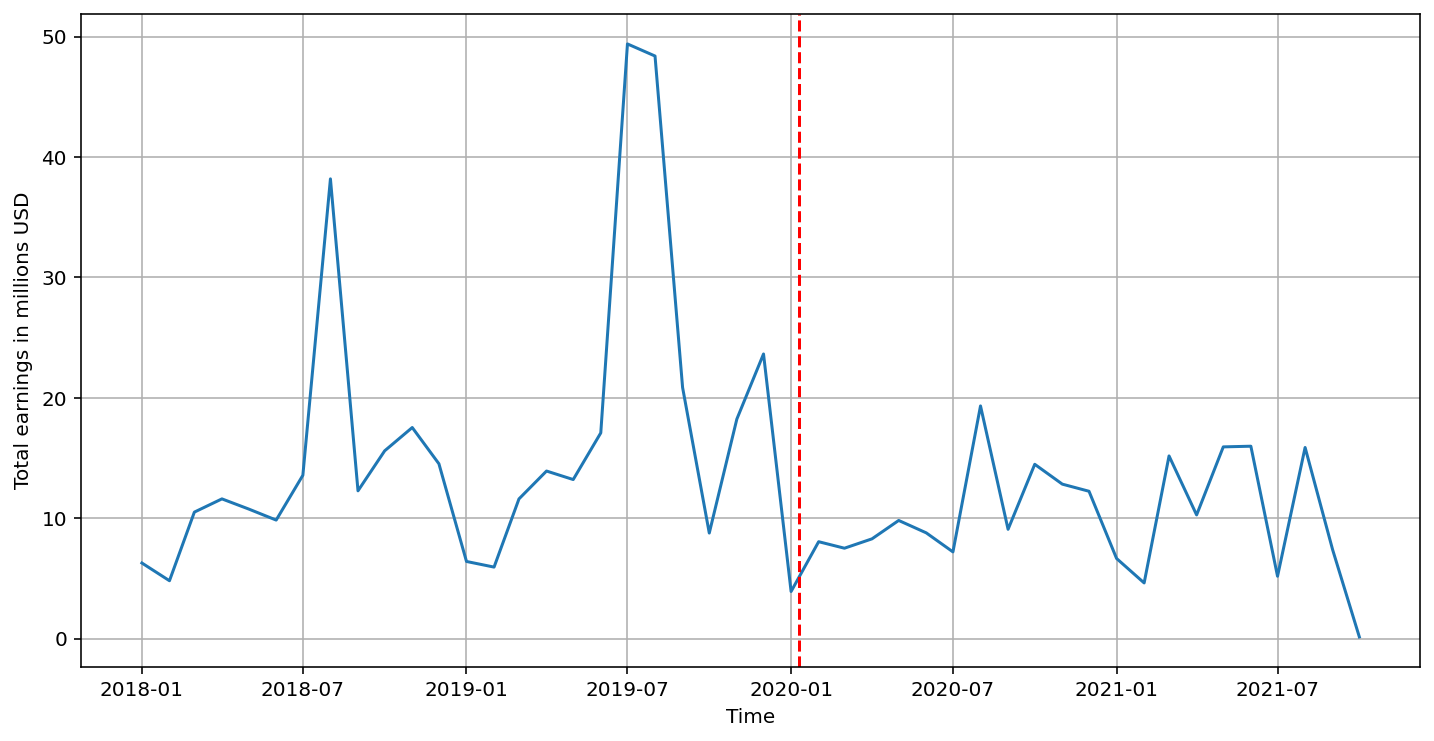

In [22]:
esport_from_2018_df = esport_monthly_sum_df.loc["2018-01-01":]
fig, ax = plt.subplots()

ax.plot(esport_from_2018_df.index, esport_from_2018_df["Earnings"] / 1000000)
ax.xaxis.set_minor_locator(xloc)

ax.set(xlabel='Time', ylabel='Total earnings in millions USD')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='-')
plt.axvline(["2020-01-10"], color="red", linestyle="--")

# plt.savefig("assets/earnings_from_2018.png")
plt.show()

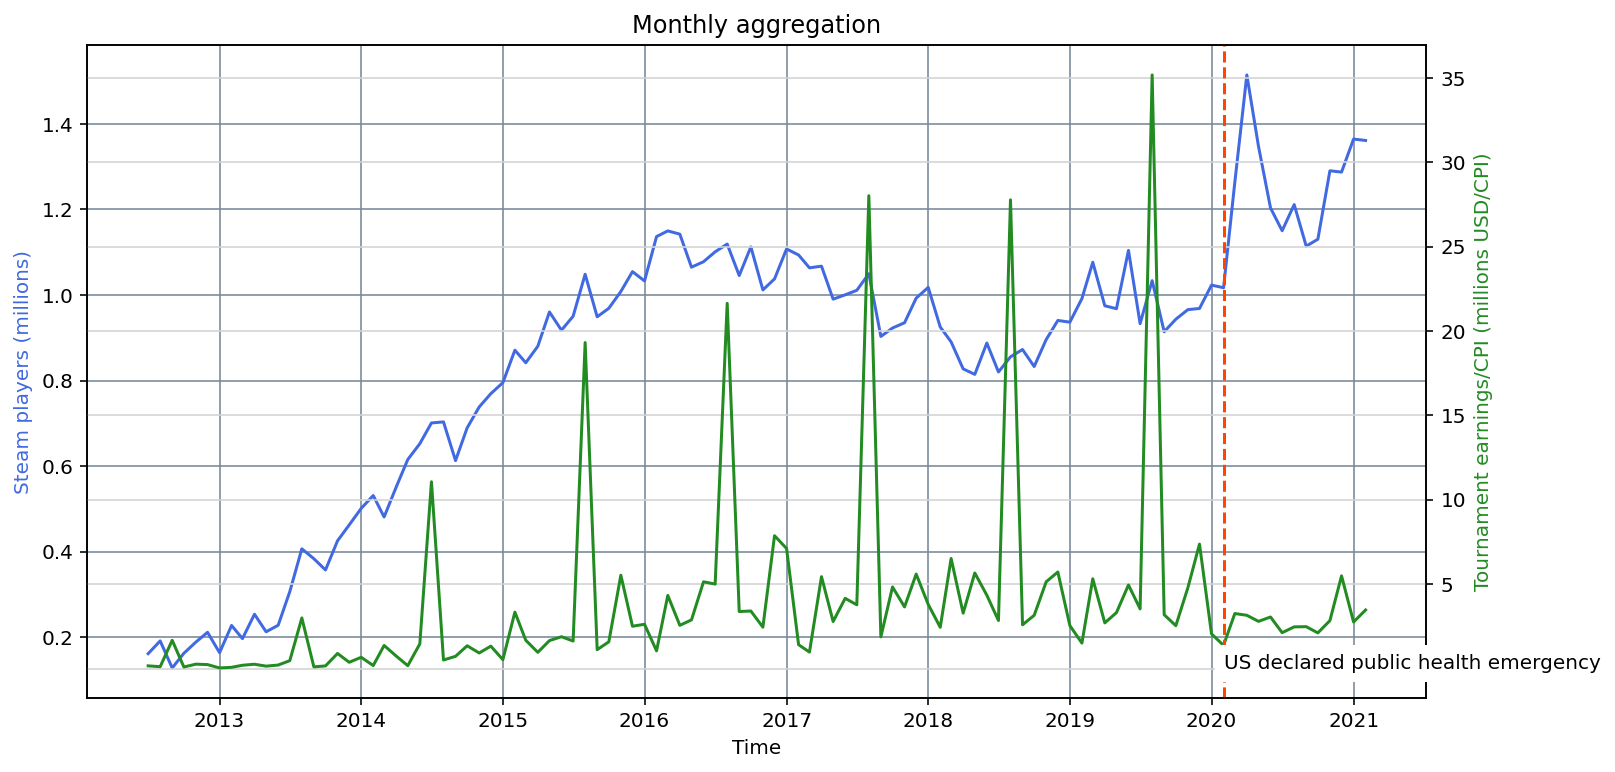

In [23]:
_, ax = plt.subplots()
ax.plot(agg.index, agg["avg"] / 1_000_000, color="royalblue")
ax.xaxis.set_minor_locator(xloc)
ax.set_xlabel("Time")
ax.set_ylabel("Steam players (millions)", color="royalblue")
ax.grid(which="major", linestyle='-', color="lightslategray")

ax2 = ax.twinx()
ax2.plot(agg["Earnings"] / 1_000_000, color="forestgreen")
ax2.set_ylabel("Tournament earnings/CPI (millions USD/CPI)", color="forestgreen")
ax2.grid(which="major", linestyle='-', color="lightgray")

plt.title("Monthly aggregation")
plt.axvline(["2020-02-03"], color="orangered", linestyle="--")
plt.text(["2020-02-03"], 0, 'US declared public health emergency', backgroundcolor="white")
# plt.savefig("assets/players_and_earnings.png")
plt.show()

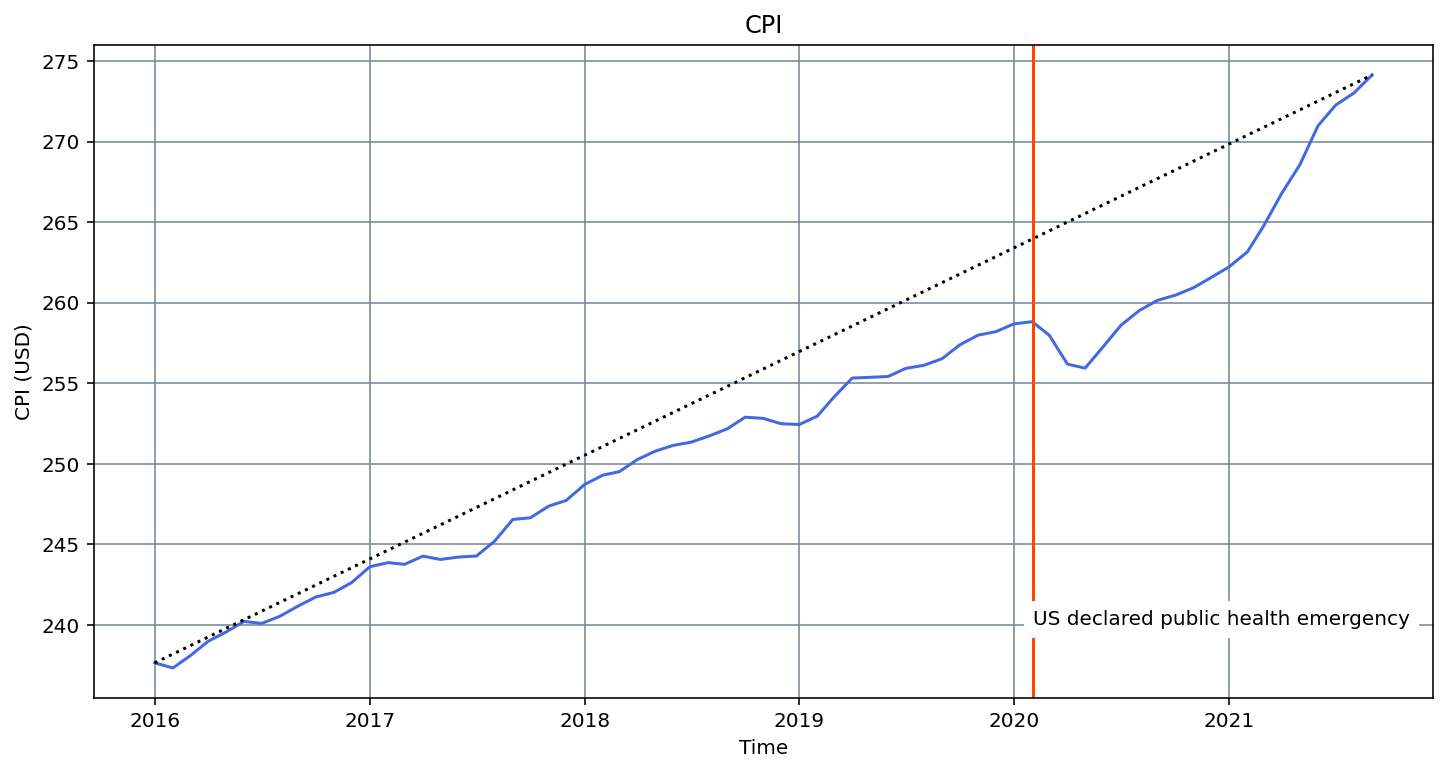

In [24]:
cpi_plot_df = cpi_df.loc["2016-01-01":]
cpi_first_last_df = cpi_plot_df.iloc[[0, -1]]

_, ax = plt.subplots()
ax.plot(cpi_plot_df.index, cpi_plot_df["value"], color="royalblue")
ax.plot(cpi_first_last_df.index, cpi_first_last_df["value"], color="black", linestyle="dotted")
ax.xaxis.set_minor_locator(xloc)
ax.set_xlabel("Time")
ax.set_ylabel("CPI (USD)")
ax.grid(which="major", linestyle='-', color="lightslategray")

plt.title("CPI")
plt.axvline(["2020-02-03"], color="orangered", linestyle="-")
plt.text(["2020-02-03"], 240, 'US declared public health emergency', backgroundcolor="white")
# plt.savefig("assets/cpi.png")
plt.show()

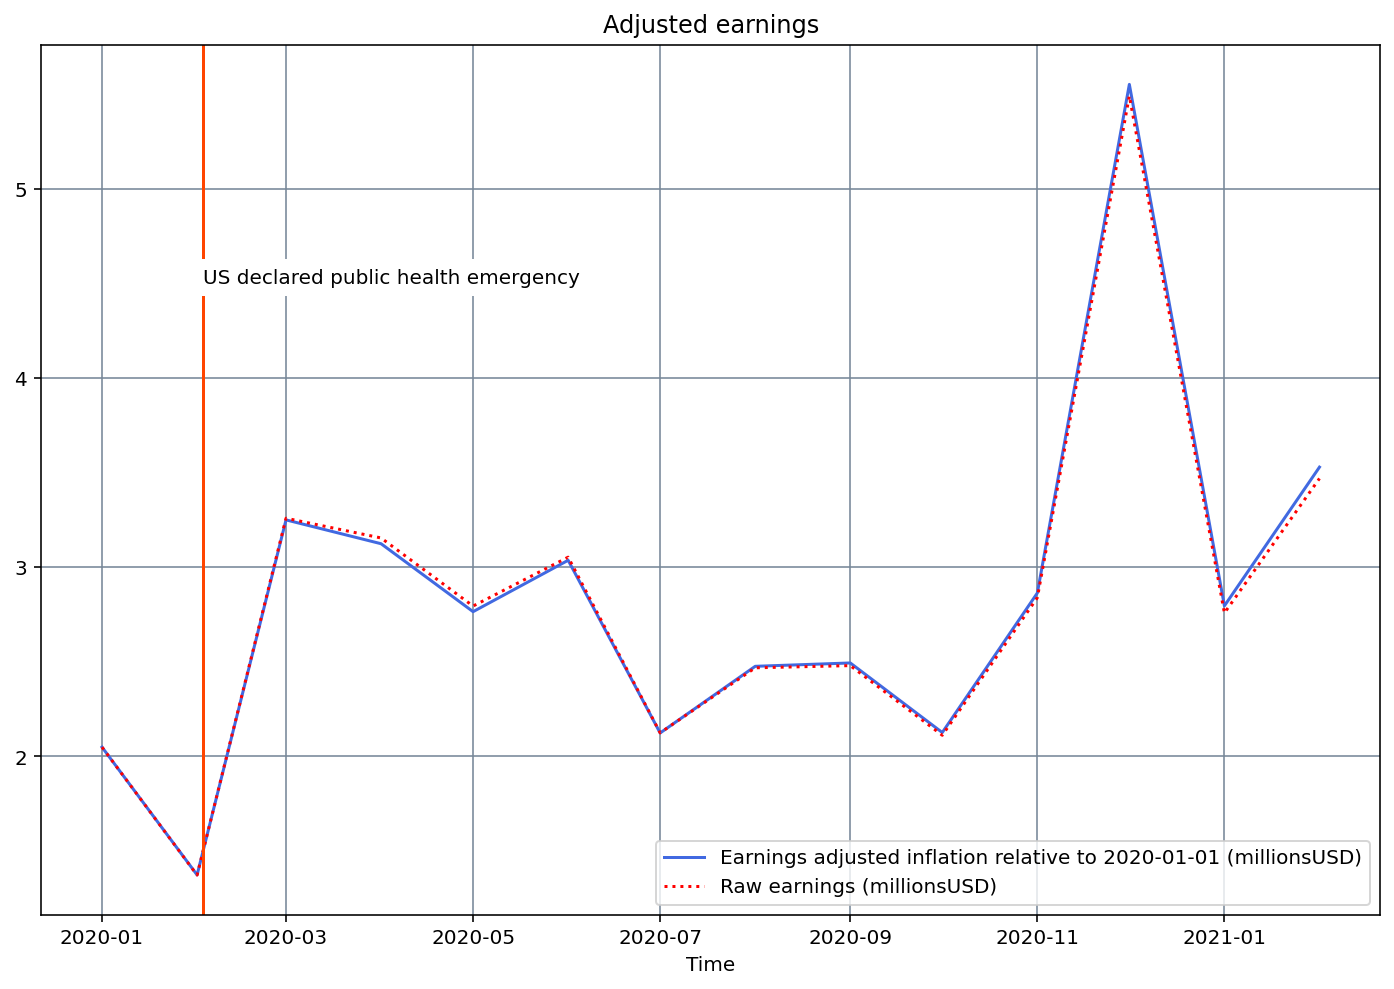

In [25]:
start_date = "2020-01-01"
agg_plot_df = agg.loc[start_date:]
agg_plot_df = agg_plot_df.merge(cpi_df, left_on="Date", right_index=True, how="inner")
relative_value = agg_plot_df.iloc[0]["value"]
agg_plot_df["EarningsAdjusted"] = agg_plot_df["Earnings"] * (agg_plot_df["value"] / relative_value)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.plot(agg_plot_df.index, agg_plot_df["EarningsAdjusted"] / 1_000_000, color="royalblue")
ax.plot(agg_plot_df.index, agg_plot_df["Earnings"] / 1_000_000, color="red", linestyle="dotted")

ax.xaxis.set_minor_locator(xloc)
ax.set_xlabel("Time")
ax.legend(["Earnings adjusted inflation relative to " + start_date + " (millionsUSD)", "Raw earnings (millionsUSD)"])
ax.grid(which="major", linestyle='-', color="lightslategray")

plt.title("Adjusted earnings")
plt.axvline(["2020-02-03"], color="orangered", linestyle="-")
plt.text(["2020-02-03"], 4.5, 'US declared public health emergency', backgroundcolor="white")

# plt.savefig("assets/earnings_inflation_adjusted.png")
plt.show()

In [26]:
before_covid = agg["2019-01-01":"2019-12-01"]
covid = agg["2020-01-01":"2020-12-01"]

before_earnings_sum = before_covid["Earnings"].sum()
covid_earnings_sum = covid["Earnings"].sum()

before_players_avg = before_covid["avg"].mean()
covid_players_avg = covid["avg"].mean()

difference = covid_earnings_sum - before_earnings_sum
percent = 100 * difference / before_earnings_sum

### General

In [27]:
print("2019 earnings sum: {:.2f} USD".format(before_earnings_sum))
print("2020 earnings sum: {:.2f} USD".format(covid_earnings_sum))
print("difference: {:.2f} ({:.2f}%) USD".format(difference, percent))

print()

print("2019 average monthly players: {:.2f}".format(before_players_avg))
print("2020 average monthly players: {:.2f}".format(covid_players_avg))

print()

mask = (joined["Date"] >= "2019-01-01") & (joined["date"] < "2020-01-01")
before_covid = joined.loc[mask]

mask = (joined["Date"] >= "2020-01-01") & (joined["date"] < "2021-01-01")
covid = joined.loc[mask]

before_game_agg = before_covid[["Game", "Earnings", "avg"]].groupby("Game").agg({"Earnings": "sum", "avg": "mean"})
before_game_agg.rename(columns={"Earnings": "OldEarnings", "avg": "old_avg"}, inplace=True)
covid_game_agg = covid[["Game", "Earnings", "avg"]].groupby("Game").agg({"Earnings": "sum", "avg": "mean"})

2019 earnings sum: 76954625.30 USD
2020 earnings sum: 33201010.28 USD
difference: -43753615.02 (-56.86%) USD

2019 average monthly players: 984293.81
2020 average monthly players: 1212800.70



### Specific games

In [28]:
game_df = before_game_agg.merge(covid_game_agg, left_on="Game", right_on="Game")
game_df["EarningsDiff"] = game_df["Earnings"] - game_df["OldEarnings"]
game_df["avg_diff"] = game_df["avg"] - game_df["old_avg"]
game_df["EarningsDiffRel"] = 100 * (game_df["Earnings"] - game_df["OldEarnings"]) / game_df["OldEarnings"]
game_df["avg_diff_rel"] = 100 * (game_df["avg"] - game_df["old_avg"]) / game_df["old_avg"]

abs_earn_gain_id = game_df['EarningsDiff'].idxmax()
abs_earn_gain = game_df.loc[abs_earn_gain_id]
print("Biggest absolute earnings GAIN: {}: ({} USD)".format(abs_earn_gain_id, abs_earn_gain["EarningsDiff"]))
abs_earn_loss_id = game_df['EarningsDiff'].idxmin()
abs_earn_loss = game_df.loc[abs_earn_loss_id]
print("Greatest absolute earnings LOSS: {} ({} USD)".format(abs_earn_loss_id, abs_earn_loss["EarningsDiff"]))

abs_players_gain_id = game_df['avg_diff'].idxmax()
abs_players_gain = game_df.loc[abs_players_gain_id]
print("Biggest absolute average monthly players GAIN: {}: ({:.2f})".format(abs_players_gain_id,
                                                                           abs_players_gain["avg_diff"]))
abs_players_loss_id = game_df['avg_diff'].idxmin()
abs_players_loss = game_df.loc[abs_players_loss_id]
print("Greatest absolute average monthly players LOSS: {} ({:.2f})".format(abs_players_loss_id,
                                                                           abs_players_loss["avg_diff"]))
print()

rel_earn_gain_id = game_df['EarningsDiffRel'].idxmax()
rel_earn_gain = game_df.loc[rel_earn_gain_id]
print("Biggest relative earnings GAIN: {}: ({:.2f}%)".format(rel_earn_gain_id, rel_earn_gain["EarningsDiffRel"]))
rel_earn_loss_id = game_df['EarningsDiffRel'].idxmin()
rel_earn_loss = game_df.loc[rel_earn_loss_id]
print("Greatest relative earnings LOSS: {} ({:.2f}%)".format(rel_earn_loss_id, rel_earn_loss["EarningsDiffRel"]))

rel_players_gain_id = game_df['avg_diff_rel'].idxmax()
rel_players_gain = game_df.loc[rel_players_gain_id]
print("Biggest relative average monthly players GAIN: {}: ({:.2f}%)".format(rel_players_gain_id,
                                                                            rel_players_gain["avg_diff_rel"]))
rel_players_loss_id = game_df['avg_diff_rel'].idxmin()
rel_players_loss = game_df.loc[rel_players_loss_id]
print("Greatest relative average monthly players LOSS: {} ({:.2f}%)".format(rel_players_loss_id,
                                                                            rel_players_loss["avg_diff_rel"]))

Biggest absolute earnings GAIN: Rocket League: (878794.54 USD)
Greatest absolute earnings LOSS: Dota 2 (-37670950.83 USD)
Biggest absolute average monthly players GAIN: Counter-Strike: Global Offensive: (258904.65)
Greatest absolute average monthly players LOSS: Dota 2 (-44310.26)

Biggest relative earnings GAIN: Rivals of Aether: (506.51%)
Greatest relative earnings LOSS: Shadowverse (-98.88%)
Biggest relative average monthly players GAIN: Rivals of Aether: (207.95%)
Greatest relative average monthly players LOSS: Dota Underlords (-67.59%)


## Conclusion
E-sport tournaments were severely impacted by Covid-19 pandemic.
On the other hand Steam games had more players than previous years.
CPI did not grow significantly greater than previous years, thus e-sport tournaments earnings were not significantly affected by inflation.